<a href="https://colab.research.google.com/github/usmeda/Concrete-Strength-ML-SIT-FDP/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to Run This Notebook**

1. Open this notebook in Google Colab or Jupyter
2. Run all cells sequentially from top to bottom
3. The dataset is automatically loaded from GitHub
4. The final trained model is saved and evaluated
5. A sample prediction is shown at the end

# **1. Problem Definition**

**Problem Statement:**
To develop a machine learning–based regression model that predicts the compressive strength of concrete using mix design parameters and curing age.

**Input variables (features):**
Cement, Slag, Fly Ash, Water, Plasticizer, Coarse Aggregate, Fine Aggregate, and Curing Age

**Output variable (target):**
Compressive Strength of concrete (MPa)

**Type of problem:**
Supervised machine learning – Regression

**Objective:**
Learn the relationship between concrete mix composition and curing age with compressive strength, enabling accurate strength prediction without conducting physical compressive tests for every mix.

# **2. Import required librarires**

**Pandas:** Reads and organizes concrete data
**NumPy:**	Performs numerical calculations
**Matplotlib:**	Basic plotting and visualization
**Seaborn:**	Advanced statistical visualization

Together, they form the data analysis and visualization layer before applying ML models.

In [1]:
import pandas as pd
#Pandas is a Python library used for data handling and manipulation. Works similar to excel

import numpy as np
#NumPy is a library for numerical and mathematical operations (matrix algebra)

import matplotlib.pyplot as plt
#Matplotlib is a plotting library used to create graphs (visualization)

import seaborn as sns
#Seaborn is built on top of Matplotlib that provides statistical visualziations

# **3. Data Collection / Loading**

In [2]:
#Read the csv flie using pandas

#CSV (Comma Separated Values) is a common format for experimental data similar to excel sheets
#Each row → one concrete mix design; Each column → one parameter (cement, water, age, strength, etc.)

url = 'https://raw.githubusercontent.com/usmeda/Concrete-Strength-ML-SIT-FDP/refs/heads/main/data/Compressive_Strength.csv'
data = pd.read_csv(url)
#Reads a CSV file and converts it into a DataFrame. The DataFrame is a tabular data structure with rows and columns
#This is equivalent to opening an Excel file and loading it into memory for analysis.

df = data.copy()
#creates an independent duplicate of the data

# **4. Exploratory Data Analysis (EDA)**

In [3]:
df.head()
#Displays the first 5 rows of the dataset by default
#necessary to confirm whether the data loaded correctly, columns are in expected order, and no obvious errors

,Cement,Slag,Fly_Ash,Water,Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.tail()

In [4]:
df.info()
'''
Provides a summary of the dataset
Displays number of rows and columns; column names; data type of each column;
Count of non-null (non-missing) values; #Memory usage

It is necessary to check whether the columns are numerical or categorical, are there any missing values,
and completeness of data.
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Fly_Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Plasticizer       1030 non-null   float64
 5   Coarse_Aggregate  1030 non-null   float64
 6   Fine_Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


'\nProvides a summary of the dataset\nDisplays number of rows and columns; column names; data type of each column;\nCount of non-null (non-missing) values; #Memory usage\n\nIt is necessary to check whether the columns are numerical or categorical, are there any missing values,\nand completeness of data.\n'

In [5]:
df.shape
#Shows the number of rows and columns present in the dataset
#Necessary to know the size of the dataset before proceeding with analysis


(1030, 9)

In [6]:
df.describe()

#Generates a statistical summary of all numerical columns in the dataset
#Necessary to understand the data spread, typical values, and potential outliers

,Cement,Slag,Fly_Ash,Water,Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
df.isnull().sum()
#Checking missing values

,0
Cement,0
Slag,0
Fly_Ash,0
Water,0
Plasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0
Strength,0


**Visulalization**

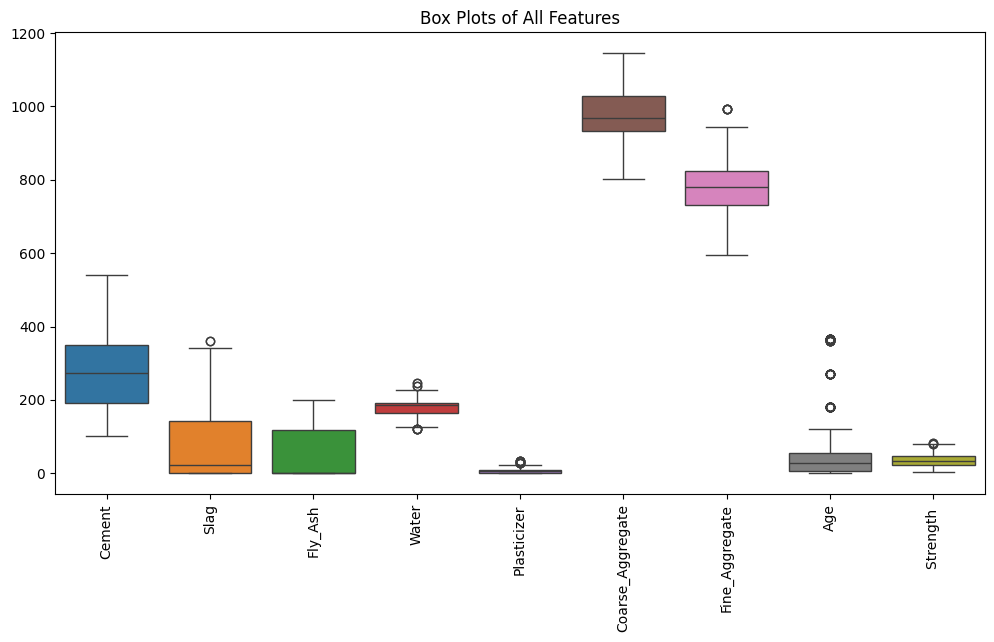

In [8]:
plt.figure(figsize=(12, 6))
#creates a new figure and sets the width and height

sns.boxplot(data=df)
#Uses Seaborn to draw a box plot for each column in the DataFrame df
#Automatically:Computes quartiles (Q1, median, Q3); Identifies whiskers and outliers
#X-axis → Variables (Cement, Water, Age, Strength, etc.)
#Y-axis → Numerical values

plt.xticks(rotation=90)
#Rotates x-axis labels by 90 degrees (vertical)

plt.title("Box Plots of All Features")
#Adds a title to the plot

plt.show()
#Dislplays the plot on the screen

What does a box plot show?
*   Box → Middle 50% of data (Interquartile Range, IQR)
*   Line inside box → Median
*   Whiskers → Acceptable data range
*   Dots outside whiskers → Outliers

Outliers are the data points that lie significantly outside the normal range of observations which could be due to experimental errors and should be examined before removing

In [9]:
#Numerical depiction of the box plot

'''
This code:
Numerically identifies outliers for every numerical variable in the dataset
Uses the Interquartile Range (IQR) method (same logic as box plots)
Produces a summary table showing how many outliers each variable has
'''

outlier_summary = []
#creates an empty list

for col in df.select_dtypes(include=["int64", "float64"]).columns: #loops through numerical columns only
    Q1 = df[col].quantile(0.25) #computes frist quartile (25% data lies below this value)
    Q3 = df[col].quantile(0.75) #computes third quartile (75% data lies below this value)
    IQR = Q3 - Q1 #computes interquartile range (represents middle 50% of the data)

    lower_bound = Q1 - 1.5 * IQR #Calculates the lower acceptable limit
    upper_bound = Q3 + 1.5 * IQR #Calculates the upper acceptable limit

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    #filters rows where values are either less than lower bound or greater than upper bound
    #.shape[0] counts how many such rows exist

    outlier_summary.append({
        "Variable": col,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Number of Outliers": outlier_count
    })
    #Appends a dictionary of results for the current variable
    #Each dictionary represents one row in the final table

outlier_table = pd.DataFrame(outlier_summary) #converts the list of dictionaries into a pandas dataframe
outlier_table #displays the final outlier summary table


,Variable,Q1,Q3,IQR,Lower Bound,Upper Bound,Number of Outliers
0,Cement,192.375000,350.000000,157.625000,-44.062500,586.437500,0
1,Slag,0.000000,142.950000,142.950000,-214.425000,357.375000,2
2,Fly_Ash,0.000000,118.270000,118.270000,-177.405000,295.675000,0
3,Water,164.900000,192.000000,27.100000,124.250000,232.650000,9
4,Plasticizer,0.000000,10.160000,10.160000,-15.240000,25.400000,10
5,Coarse_Aggregate,932.000000,1029.400000,97.400000,785.900000,1175.500000,0
6,Fine_Aggregate,730.950000,824.000000,93.050000,591.375000,963.575000,5
7,Age,7.000000,56.000000,49.000000,-66.500000,129.500000,59
8,Strength,23.707115,46.136287,22.429171,-9.936642,79.780044,4


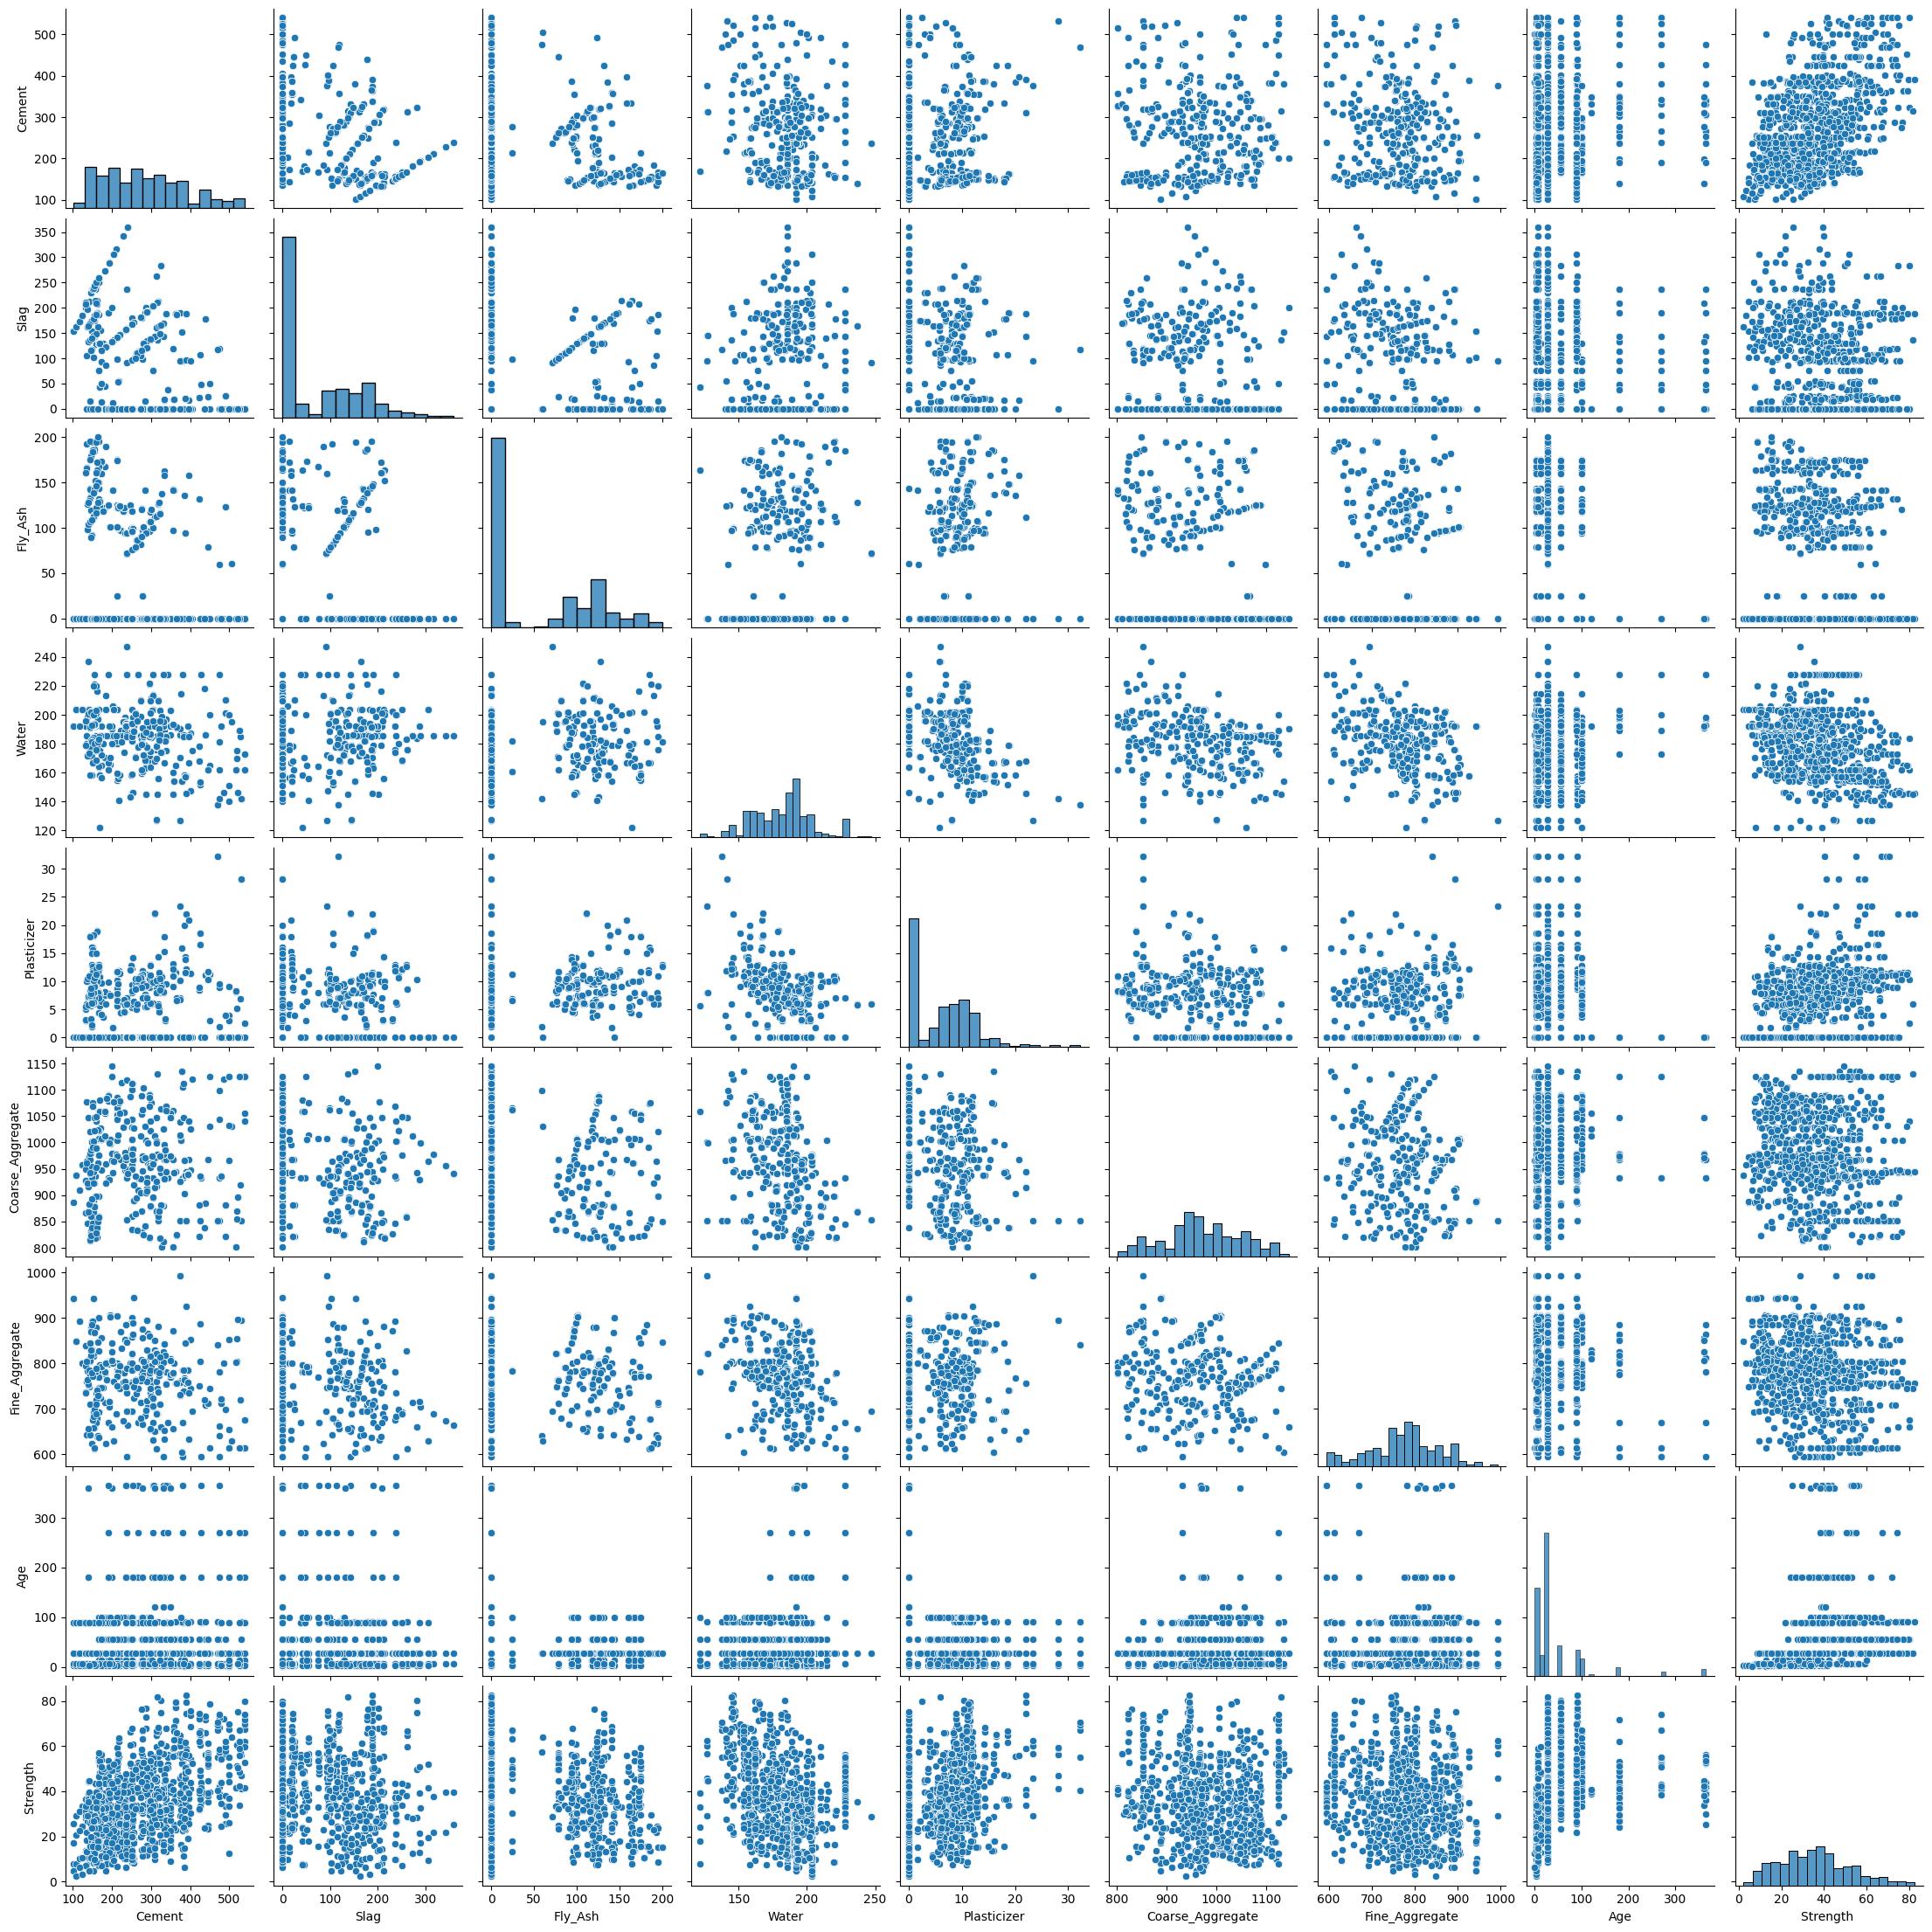

In [10]:
#generate pair plot

sns.pairplot(df)
#Creates pairwise plots between all the numerical variables in the dataset
#Necessary to examine relationships between variables
#To understand how each input parameter relates to the output (strength)

**Strength vs Age → Strong, Clearly Non-Linear Relationship**


Strength increases with age

Dense vertical bands at specific ages (1, 3, 7, 14, 28, 56, 90, 365 days)

At low ages → wide spread, lower strength

At high ages → higher strength but plateauing

**Interpretation**

Strength gain follows hydration kinetics

Early-age strength gain is rapid

Long-term gain slows → non-linear saturation behavior

**Key learning point**

This relationship is not linear; it is time-dependent and asymptotic.

**ML implication**

Linear regression will underpredict long-term strength

Tree-based models and ANN are justified

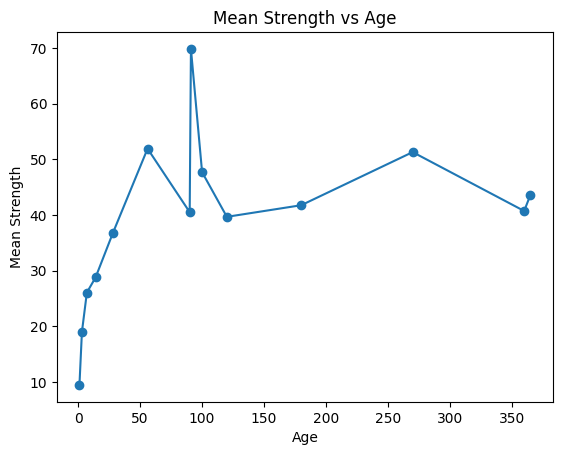

In [11]:
#Making non linerity explicit

df.groupby("Age")["Strength "].mean().plot(marker='o')
#groups the dataset by curing age. All samples tested at the same age are collected together

plt.xlabel("Age")
plt.ylabel("Mean Strength")
plt.title("Mean Strength vs Age")
plt.show()

<Axes: >

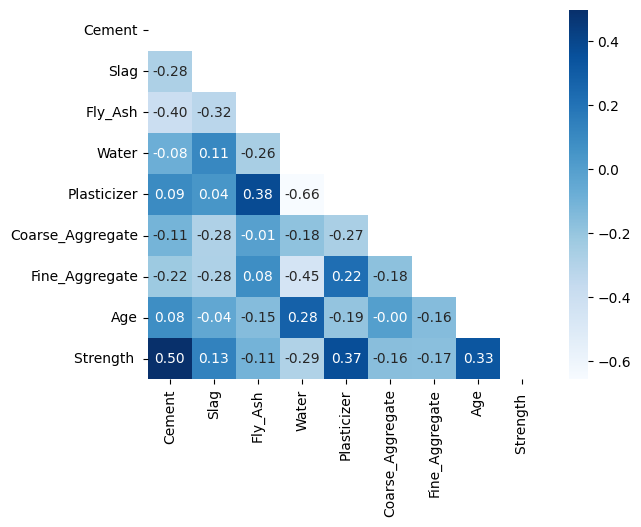

In [12]:
#generating heatmap

#1: compute the correlation matrix

corr = df.corr()
#Computes the Pearson correlation coefficient between every pair of numerical variables
#correlation measures linear relationship between two variables (linear dependence only)
#(+1) - perfect positive linear correlation
#(0) - no liner correlation
#(-1) - perfect negative linear correlation

#2: plot the heatmap
#sns.heatmap(corr, annot=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
#create a mask for upper triangle
#np.ones_like(corr) - Creates a matrix of ones with the same shape as corr
#dtype=bool - Converts the matrix to True/False values
#np.triu(...) - Keeps only the upper triangular part, Lower triangle becomes False

sns.heatmap(corr, mask = mask, annot=True, cmap="Blues", fmt ='.2f')
#corr - Data being visualized (correlation matrix)
#mask=mask - Hides the upper triangle
#annot=True - Prints numerical correlation values in each cell
#cmap="Blues" - Color map selection
#fmt='.2f' - Formats numbers to 2 decimal places

**Most Important Row: Strength (Last Row)**

**Cement → Strength (+0.50)**

🔹Strongest positive correlation in the dataset

🔹Indicates cement content is a primary strength driver

**Plasticizer → Strength (+0.37)**

🔹Moderate positive correlation

🔹Indicates indirect influence via Improved workability and Reduced water demand

**Age → Strength (+0.33)**

🔹Moderate positive correlation

🔹Confirms strength increases with curing time

**Water → Strength (–0.29)**

🔹Clear negative correlation

🔹Matches classic water–strength relationship

---
---

**Important Relationships Between Input Variables**

**Water vs Plasticizer (–0.66)**

🔹Strongest correlation in the entire heatmap

🔹Very important result

**Fine Aggregate vs Water (–0.45)**

🔹Moderate negative correlation

🔹Denser fine aggregate packing reduces water demand

**Cement vs Fly Ash (–0.40)**

🔹Strong negative correlation

🔹Indicates cement replacement by fly ash

**Cement vs Slag (–0.28)**

🔹Similar replacement behavior

🔹This confirms mix design trade-offs, not data issues.

In [ ]:
#Optional: Annotated Heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute correlation
corr = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    cbar=True
)

# ---- ADD INTERPRETATION ANNOTATIONS ---- #

# Cement – Strength
plt.text(0.5, 8.5, "Strong\npositive\ninfluence",
         color="yellow", ha="left", va="center", fontsize=9)

# Water – Strength
plt.text(3.5, 8.5, "Inverse\nwater–strength\nrelation",
         color="yellow", ha="left", va="center", fontsize=9)

# Age – Strength
plt.text(7.5, 8.5, "Age effect is\nnon-linear\n(saturation)",
         color="black", ha="left", va="center", fontsize=9)

# Plasticizer – Water
plt.text(4.5, 3.5, "Plasticizer\nreduces\nwater demand",
         color="black", ha="center", va="center", fontsize=9)

# Cement – Fly Ash
plt.text(2.5, 0.5, "Binder\nreplacement\ntrend",
         color="black", ha="center", va="center", fontsize=9)

# Title
plt.title("Correlation Heatmap with Engineering Interpretation", fontsize=12)

plt.tight_layout()
plt.show()


# **4. Data Cleaning**

Handle missing values

Remove or correct:

🔹Invalid entries

🔹Outliers (if physically unjustified)

🔹Ensure consistent units

None of these are required for this dataset

# **5. Feature Engineering**

Create or modify input variables to improve learning

Examples

🔹Water–cement ratio

🔹Total binder content

🔹Age categories (early / long-term curing)

Feature engineering helps ML models capture known concrete behavior more explicitly, especially non-linear and interaction effects.

In [13]:
def feature_engineering(df):
    df = df.copy()

    df["Water_Cement_Ratio"] = df["Water"] / df["Cement"]
    #Feature 1: Water–Cement Ratio (Most Important); Engineering basis: Abram’s law

    df["Total_Binder"] = df["Cement"] + df["Slag"] + df["Fly_Ash"]
    #Feature 2: total binder content including supplementary cementitous materials (SCMs)

    df["SCM_Replacement_Ratio"] = (df["Slag"] + df["Fly_Ash"]) / df["Total_Binder"]
    #Feature 3: SCM Replacement Ratio; Fraction of binder replaced by SCMs

    df["Water_Binder_Ratio"] = df["Water"] / df["Total_Binder"]
    #Feature 4: Water–Binder Ratio; More general than w/c for blended concretes

    df["Aggregate_Binder_Ratio"] = (
        df["Coarse_Aggregate"] + df["Fine_Aggregate"]
    ) / df["Total_Binder"]
    #Feature 5: Aggregate–Binder Ratio; Reflects packing density influence

    df["Log_Age"] = np.log(df["Age"])
    #Feature 6: Age Transformation (to capture non-linearity); Hydration kinetics are logarithmic-like

    df["SCM_Age_Interaction"] = df["SCM_Replacement_Ratio"] * df["Log_Age"]
    #Optional: Interaction Features; Age × SCM interaction (long-term strength contribution)

    return df

from sklearn.preprocessing import FunctionTransformer

feature_engineering_transformer = FunctionTransformer(
    feature_engineering,
    validate=False
)

In [14]:
df_fe = feature_engineering(df)
df_fe.head()

,Cement,Slag,Fly_Ash,Water,Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength,Water_Cement_Ratio,Total_Binder,SCM_Replacement_Ratio,Water_Binder_Ratio,Aggregate_Binder_Ratio,Log_Age,SCM_Age_Interaction
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000,540.0,0.0,0.30000,3.177778,3.332205,0.000000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000,540.0,0.0,0.30000,3.205556,3.332205,0.000000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714,475.0,0.3,0.48000,3.212632,5.598422,1.679527
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714,475.0,0.3,0.48000,3.212632,5.899897,1.769969
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767,331.0,0.4,0.58006,5.449849,5.886104,2.354442


In [15]:
df_fe.columns

Index(['Cement', 'Slag', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse_Aggregate',
       'Fine_Aggregate', 'Age', 'Strength ', 'Water_Cement_Ratio',
       'Total_Binder', 'SCM_Replacement_Ratio', 'Water_Binder_Ratio',
       'Aggregate_Binder_Ratio', 'Log_Age', 'SCM_Age_Interaction'],
      dtype='object')

# **8. Feature - Label (target) separation**

> Add blockquote



In [16]:
#extracting features and label

X = df.drop("Strength ", axis=1)
#Creates a new DataFrame X; Contains all columns except "Strength"
#drop() removes a column or row
#"Strength" → column to be removed
#axis=1 → specifies column-wise removal
#capital letter indicates a matrix (feature matrix)

y = df["Strength "]

#Extracts the Strength column only; Stores it as a separate variable y (target vector)

In [17]:
X

,Cement,Slag,Fly_Ash,Water,Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [18]:
y

,Strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075
...,...
1025,44.284354
1026,31.178794
1027,23.696601
1028,32.768036


# **9. Train - Test Split**

split the dataset into training and testing subsets, so that:

🔹The model learns from one portion of data

🔹The model is evaluated on unseen data

This is a mandatory step in any machine-learning workflow.

In [19]:
#splitting data into train and test sets

from sklearn.model_selection import train_test_split
#Imports the train_test_split function from scikit-learn
#This function is used to randomly divide data into training and test sets
#scikit-learn is the standard ML library in Python

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X,y: Features and target are passed separately
#test_size=0.2: Specifies that 20% of the data is used for testing; Remaining 80% is used for training
#random_state=42: Fixes the random number generator; Ensures same split every time the code is run and reproducibility of results

In [20]:
X_train.shape

(824, 8)

In [21]:
X_test.shape

(206, 8)

In [22]:
y_train.shape

(824,)

In [23]:
y_test.shape

(206,)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Performance:")
    print(f"R²   : {r2:.3f}")
    print(f"MAE  : {mae:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")

    return r2, mae, mse, rmse

# **10. Model training with scaling and cross validation followed by evaluation**

Train–test split is sufficient when:

🔹Dataset is reasonably large (≈ 800–1000+ samples)

🔹Goal is quick model development or teaching

🔹You are not tuning many hyperparameters

🔹Model performance is not highly sensitive to data split

Scaling REQUIRED for (linear models):

🔹Linear Regression

🔹Support Vector Regression (SVR)

🔹Artificial Neural Networks (ANN)

🔹KNN

Scaling NOT required for (non-linear models):

🔹Decision Tree

🔹Random Forest

🔹Gradient Boosting

Cross-validation is required when:

🔹Dataset is moderate in size (≤ 2000 samples)

🔹Data has high variability

🔹You are comparing multiple models

🔹You are tuning hyperparameters

🔹Results are meant for research or publication

In [25]:
#importing the necessary libraries

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [26]:
#Define K-Fold cross validation strategy

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
#Model 1: Linear Regression (Scaling REQUIRED)

# Define model ONCE
lr_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# 1. Cross-validation (model selection)
lr_scores = cross_val_score(
    lr_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("Linear Regression (Baseline) CV R²:", lr_scores.mean())

# 2. Final evaluation (test set)
evaluate_model(
    lr_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="Linear Regression (Baseline)"
)

Linear Regression (Baseline) CV R²: 0.8324739212881724

Linear Regression (Baseline) Performance:
R²   : 0.840
MAE  : 5.191
MSE  : 41.167
RMSE : 6.416


(0.8402397051360981,
 5.190948755393464,
 41.16720661425662,
 np.float64(6.416167595555514))

In [28]:
#Model 2: Support Vector Regression (Scaling MANDATORY)

svr_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", SVR(kernel="rbf"))
])

# 1. Cross-validation
svr_scores = cross_val_score(
    svr_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("SVR (Baseline) CV R²:", svr_scores.mean())

# 2. Final evaluation
evaluate_model(
    svr_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="SVR (Baseline)"
)

SVR (Baseline) CV R²: 0.7823201503368623

SVR (Baseline) Performance:
R²   : 0.809
MAE  : 5.400
MSE  : 49.114
RMSE : 7.008


(0.8094004278154933,
 5.400039003084322,
 49.11390515016777,
 np.float64(7.008131359368756))

In [29]:
#Model 3: Artificial Neural Network (ANN) (Scaling MANDATORY)

ann_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", MLPRegressor(
        hidden_layer_sizes=(50, 50),
        max_iter=1000,
        random_state=42
    ))
])

# 1. Cross-validation
ann_scores = cross_val_score(
    ann_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("ANN (Baseline) CV R²:", ann_scores.mean())

# 2. Final evaluation
evaluate_model(
    ann_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="ANN (Baseline)"
)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

ANN (Baseline) CV R²: 0.9207399206236653

ANN (Baseline) Performance:
R²   : 0.891
MAE  : 3.523
MSE  : 28.098
RMSE : 5.301


(0.8909598918508264,
 3.5231963200863463,
 28.09757371343079,
 np.float64(5.3007144531120325))

In [32]:
#Model 4: Decision Tree (Scaling NOT Required)

dt_pipeline = Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", DecisionTreeRegressor(random_state=42))
        ])

# 1. Cross-validation
dt_scores = cross_val_score(
    dt_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("Decision Tree (Baseline) CV R²:", dt_scores.mean())

# 2. Final evaluation
evaluate_model(
    dt_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="Decision Tree (Baseline)"
)

Decision Tree (Baseline) CV R²: 0.82937245727611

Decision Tree (Baseline) Performance:
R²   : 0.833
MAE  : 4.108
MSE  : 43.036
RMSE : 6.560


(0.8329873132407892,
 4.107719184228156,
 43.036010849101594,
 np.float64(6.560183751168986))

In [33]:
#Model 5: Random Forest (Scaling NOT Required)

rf_pipeline = Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", RandomForestRegressor(random_state=42))
        ])

# 1. Cross-validation
rf_scores = cross_val_score(
    rf_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("Random Forest (Baseline) CV R²:", rf_scores.mean())

# 2. Final evaluation
evaluate_model(
    rf_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="Random Forest (Baseline)"
)

Random Forest (Baseline) CV R²: 0.9005339302374258

Random Forest (Baseline) Performance:
R²   : 0.905
MAE  : 3.376
MSE  : 24.561
RMSE : 4.956


(0.904685724410401,
 3.3758935961640986,
 24.56068624452581,
 np.float64(4.955873913299834))

In [35]:
#Model 6: Gradient Boosting (Scaling NOT Required)

gb_pipeline = Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", GradientBoostingRegressor(random_state=42))
        ]) # Removed the trailing comma here

# 1. Cross-validation
gb_scores = cross_val_score(
    gb_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("Gradient Boosting (Baseline) CV R²:", gb_scores.mean())

# 2. Final evaluation
evaluate_model(
    gb_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="Gradient Boosting (Baseline)"
)

Gradient Boosting (Baseline) CV R²: 0.9092660730241438

Gradient Boosting (Baseline) Performance:
R²   : 0.910
MAE  : 3.476
MSE  : 23.178
RMSE : 4.814


(0.9100500484425359,
 3.476086195681292,
 23.17840139105299,
 np.float64(4.814395225887981))

In [36]:
#Model 7: XGBoost Regressor (Scaling NOT required)

xgb_pipeline = Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", XGBRegressor(
                objective="reg:squarederror",
                random_state=42))
])

# 1. Cross-validation
xgb_scores = cross_val_score(
    xgb_pipeline, X_train, y_train, cv=kf, scoring="r2"
)

print("XGBoost (Baseline) CV R²:", xgb_scores.mean())

# 2. Final evaluation
evaluate_model(
    xgb_pipeline,
    X_train, X_test,
    y_train, y_test,
    model_name="XGBoost (Baseline)"
)

XGBoost (Baseline) CV R²: 0.9021930185878126

XGBoost (Baseline) Performance:
R²   : 0.921
MAE  : 2.939
MSE  : 20.244
RMSE : 4.499


(0.9214376246509992,
 2.9387031902875567,
 20.2440383629379,
 np.float64(4.499337547121565))

In [37]:
# Compare all models using CV R² (model selection)

cv_results = {
    "Linear Regression": lr_scores.mean(),
    "SVR": svr_scores.mean(),
    "ANN": ann_scores.mean(),
    "Decision Tree": dt_scores.mean(),
    "Random Forest": rf_scores.mean(),
    "Gradient Boosting": gb_scores.mean(),
    "XGBoost": xgb_scores.mean()
}

print("Cross-Validated R² Scores:")
for model, score in cv_results.items():
    print(f"{model:20s}: {score:.3f}")

Cross-Validated R² Scores:
Linear Regression   : 0.832
SVR                 : 0.782
ANN                 : 0.921
Decision Tree       : 0.829
Random Forest       : 0.901
Gradient Boosting   : 0.909
XGBoost             : 0.902


In [39]:
results = {}

results["Linear Regression"] = evaluate_model(
    lr_pipeline, X_train, X_test, y_train, y_test, "Linear Regression"
)

results["SVR"] = evaluate_model(
    svr_pipeline, X_train, X_test, y_train, y_test, "SVR"
)

results["ANN"] = evaluate_model(
    ann_pipeline, X_train, X_test, y_train, y_test, "ANN"
)

results["Decision Tree"] = evaluate_model(
    dt_pipeline, X_train, X_test, y_train, y_test, "Decision Tree"
)

results["Random Forest"] = evaluate_model(
    rf_pipeline, X_train, X_test, y_train, y_test, "Random Forest"
)

results["Gradient Boosting"] = evaluate_model(
    gb_pipeline, X_train, X_test, y_train, y_test, "Gradient Boosting"
)

results["XGBoost"] = evaluate_model(
    xgb_pipeline, X_train, X_test, y_train, y_test, "XGBoost"
)


Linear Regression Performance:
R²   : 0.840
MAE  : 5.191
MSE  : 41.167
RMSE : 6.416

SVR Performance:
R²   : 0.809
MAE  : 5.400
MSE  : 49.114
RMSE : 7.008

ANN Performance:
R²   : 0.891
MAE  : 3.523
MSE  : 28.098
RMSE : 5.301

Decision Tree Performance:
R²   : 0.833
MAE  : 4.108
MSE  : 43.036
RMSE : 6.560

Random Forest Performance:
R²   : 0.905
MAE  : 3.376
MSE  : 24.561
RMSE : 4.956

Gradient Boosting Performance:
R²   : 0.910
MAE  : 3.476
MSE  : 23.178
RMSE : 4.814

XGBoost Performance:
R²   : 0.921
MAE  : 2.939
MSE  : 20.244
RMSE : 4.499


In [40]:
import pandas as pd

results_df = pd.DataFrame.from_dict(
    results,
    orient="index",
    columns=["R2", "MAE", "MSE", "RMSE"]
)

results_df = results_df.sort_values(by="RMSE")

print(results_df)

                         R2       MAE        MSE      RMSE
XGBoost            0.921438  2.938703  20.244038  4.499338
Gradient Boosting  0.910050  3.476086  23.178401  4.814395
Random Forest      0.904686  3.375894  24.560686  4.955874
ANN                0.890960  3.523196  28.097574  5.300714
Linear Regression  0.840240  5.190949  41.167207  6.416168
Decision Tree      0.832987  4.107719  43.036011  6.560184
SVR                0.809400  5.400039  49.113905  7.008131


In [42]:
# Optional: BASELINE MODEL COMPARISON (NO TUNING); Define all baseline models once

models = {
    "Linear Regression": Pipeline([
        ("feature_engineering", feature_engineering_transformer),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "SVR": Pipeline([
        ("feature_engineering", feature_engineering_transformer),
        ("scaler", StandardScaler()),
        ("model", SVR(kernel="rbf"))
    ]),

    "ANN": Pipeline([
        ("feature_engineering", feature_engineering_transformer),
        ("scaler", StandardScaler()),
        ("model", MLPRegressor(hidden_layer_sizes=(50,50),
                               max_iter=1000,
                               random_state=42))
    ]),

    "Decision Tree": Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", DecisionTreeRegressor(random_state=42))
        ]),

    "Random Forest": Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", RandomForestRegressor(random_state=42))
        ]),

    "Gradient Boosting": Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", GradientBoostingRegressor(random_state=42))
        ]),

    "XGBoost": Pipeline([
            ("feature_engineering", feature_engineering_transformer),
            ("model", XGBRegressor(
                objective="reg:squarederror",
                random_state=42))
])
}

In [43]:
# A. Cross-validated R² (Model Selection)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model, X_train, y_train, cv=kf, scoring="r2"
    )
    cv_results[name] = scores.mean()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

In [44]:
# B. Test-Set Evaluation (ONCE per model)

test_results = {}

for name, model in models.items():
    test_results[name] = evaluate_model(
        model, X_train, X_test, y_train, y_test, name
    )


Linear Regression Performance:
R²   : 0.840
MAE  : 5.191
MSE  : 41.167
RMSE : 6.416

SVR Performance:
R²   : 0.809
MAE  : 5.400
MSE  : 49.114
RMSE : 7.008

ANN Performance:
R²   : 0.891
MAE  : 3.523
MSE  : 28.098
RMSE : 5.301

Decision Tree Performance:
R²   : 0.833
MAE  : 4.108
MSE  : 43.036
RMSE : 6.560

Random Forest Performance:
R²   : 0.905
MAE  : 3.376
MSE  : 24.561
RMSE : 4.956

Gradient Boosting Performance:
R²   : 0.910
MAE  : 3.476
MSE  : 23.178
RMSE : 4.814

XGBoost Performance:
R²   : 0.921
MAE  : 2.939
MSE  : 20.244
RMSE : 4.499


In [45]:
# C. Results Table

import pandas as pd

cv_df = pd.DataFrame.from_dict(
    cv_results, orient="index", columns=["CV_R2"]
).sort_values(by="CV_R2", ascending=False)

test_df = pd.DataFrame.from_dict(
    test_results,
    orient="index",
    columns=["R2", "MAE", "MSE", "RMSE"]
).sort_values(by="RMSE")

print("=== Cross-Validated R² (Model Selection) ===")
print(cv_df)

print("\n=== Test Set Performance (Final Evaluation) ===")
print(test_df)

=== Cross-Validated R² (Model Selection) ===
                      CV_R2
ANN                0.920740
Gradient Boosting  0.909266
XGBoost            0.902193
Random Forest      0.900534
Linear Regression  0.832474
Decision Tree      0.829372
SVR                0.782320

=== Test Set Performance (Final Evaluation) ===
                         R2       MAE        MSE      RMSE
XGBoost            0.921438  2.938703  20.244038  4.499338
Gradient Boosting  0.910050  3.476086  23.178401  4.814395
Random Forest      0.904686  3.375894  24.560686  4.955874
ANN                0.890960  3.523196  28.097574  5.300714
Linear Regression  0.840240  5.190949  41.167207  6.416168
Decision Tree      0.832987  4.107719  43.036011  6.560184
SVR                0.809400  5.400039  49.113905  7.008131


# **11. Hyperparameter Tuning**

In [72]:
#Model 1: Linear Regression has very limited or no hyperparameters to tune and hence Ridge Regression is considered

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

ridge_param_grid = {
    "model__alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=kf,
    scoring="r2"
)

ridge_grid.fit(X_train, y_train)

print("Best Ridge parameters:", ridge_grid.best_params_)
print("Best CV R²:", ridge_grid.best_score_)

Best Ridge parameters: {'model__alpha': 0.1}
Best CV R²: 0.8324894804989296


In [73]:
#Model 2: Support Vector Regression (SVR)

from sklearn.svm import SVR

svr_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", SVR())
])

svr_param_grid = {
    "model__C": [1, 10, 100],
    "model__gamma": ["scale", 0.01, 0.1],
    "model__epsilon": [0.01, 0.1, 0.2]
}

svr_grid = GridSearchCV(
    svr_pipeline,
    svr_param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)

svr_grid.fit(X_train, y_train)

print("Best SVR parameters:", svr_grid.best_params_)
print("Best CV R²:", svr_grid.best_score_)

Best SVR parameters: {'model__C': 100, 'model__epsilon': 0.2, 'model__gamma': 'scale'}
Best CV R²: 0.9132371151455635


In [74]:
#Model 3: ANN (MLPRegressor) – Use RandomizedSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

ann_pipeline = Pipeline([
    ("feature_engineering", feature_engineering_transformer),
    ("scaler", StandardScaler()),
    ("model", MLPRegressor(max_iter=1000, random_state=42))
])

ann_param_dist = {
    "model__hidden_layer_sizes": [(50,), (100,), (50,50), (100,50)],
    "model__alpha": [0.0001, 0.001, 0.01],
    "model__learning_rate_init": [0.001, 0.01]
}

ann_search = RandomizedSearchCV(
    ann_pipeline,
    ann_param_dist,
    n_iter=10,
    cv=kf,
    scoring="r2",
    random_state=42,
    n_jobs=-1
)

ann_search.fit(X_train, y_train)

print("Best ANN parameters:", ann_search.best_params_)
print("Best CV R²:", ann_search.best_score_)

Best ANN parameters: {'model__learning_rate_init': 0.01, 'model__hidden_layer_sizes': (50, 50), 'model__alpha': 0.001}
Best CV R²: 0.9139007581526137


In [49]:
#Model 4: Decision Tree (GridSearchCV)

from sklearn.tree import DecisionTreeRegressor

dt_param_grid = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_param_grid,
    cv=kf,
    scoring="r2"
)

dt_grid.fit(X_train, y_train)

print("Best DT parameters:", dt_grid.best_params_)
print("Best CV R²:", dt_grid.best_score_)

Best DT parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV R²: 0.8380772452968795


In [50]:
#Model 5: Random Forest (RandomizedSearchCV)

from sklearn.ensemble import RandomForestRegressor

rf_param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_dist,
    n_iter=20,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("Best RF parameters:", rf_search.best_params_)
print("Best CV R²:", rf_search.best_score_)

Best RF parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV R²: 0.8999646482541651


In [51]:
#Model 6: Gradient Boosting (GridSearchCV)

from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=kf,
    scoring="r2"
)

gb_grid.fit(X_train, y_train)

print("Best GB parameters:", gb_grid.best_params_)
print("Best CV R²:", gb_grid.best_score_)

Best GB parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best CV R²: 0.9128109230757137


In [52]:
#Model 7: XGBoost (RandomizedSearchCV)

from xgboost import XGBRegressor

xgb_param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(
        objective="reg:squarederror",
        random_state=42
    ),
    xgb_param_dist,
    n_iter=20,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)

print("Best XGB parameters:", xgb_search.best_params_)
print("Best CV R²:", xgb_search.best_score_)

Best XGB parameters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best CV R²: 0.9232290708931827


In [53]:
#Collect all tuned models in one directory

tuned_models = {
    "Ridge Regression (Tuned)": ridge_grid.best_estimator_,
    "SVR (Tuned)": svr_grid.best_estimator_,
    "ANN (Tuned)": ann_search.best_estimator_,
    "Decision Tree (Tuned)": dt_grid.best_estimator_,
    "Random Forest (Tuned)": rf_search.best_estimator_,
    "Gradient Boosting (Tuned)": gb_grid.best_estimator_,
    "XGBoost (Tuned)": xgb_search.best_estimator_
}

In [54]:
#Final Evaluation of ALL Tuned Models (Test Set)

final_results = {}

for name, model in tuned_models.items():
    final_results[name] = evaluate_model(
        model,
        X_train, X_test,
        y_train, y_test,
        model_name=name
    )


Ridge Regression (Tuned) Performance:
R²   : 0.628
MAE  : 7.746
MSE  : 95.974
RMSE : 9.797

SVR (Tuned) Performance:
R²   : 0.870
MAE  : 4.110
MSE  : 33.618
RMSE : 5.798

ANN (Tuned) Performance:
R²   : 0.885
MAE  : 4.122
MSE  : 29.716
RMSE : 5.451

Decision Tree (Tuned) Performance:
R²   : 0.804
MAE  : 4.740
MSE  : 50.504
RMSE : 7.107

Random Forest (Tuned) Performance:
R²   : 0.881
MAE  : 3.794
MSE  : 30.653
RMSE : 5.537

Gradient Boosting (Tuned) Performance:
R²   : 0.930
MAE  : 2.754
MSE  : 17.979
RMSE : 4.240

XGBoost (Tuned) Performance:
R²   : 0.939
MAE  : 2.715
MSE  : 15.591
RMSE : 3.949


In [55]:
#Consolidated Final Results Table

import pandas as pd

final_results_df = pd.DataFrame.from_dict(
    final_results,
    orient="index",
    columns=["R2", "MAE", "MSE", "RMSE"]
).sort_values(by="RMSE")

In [56]:
# === Baseline vs Tuned Model Comparison (Corrected & Consolidated) ===

# 1. Make safe copies
baseline_df = test_df.copy()
tuned_df = final_results_df.copy()

# 2. Normalize model names (remove " (Tuned)")
tuned_df.index = tuned_df.index.str.replace(" (Tuned)", "", regex=False)

# 3. Keep only common models
common_models = baseline_df.index.intersection(tuned_df.index)
baseline_df = baseline_df.loc[common_models]
tuned_df = tuned_df.loc[common_models]

# 4. Add suffixes for clarity
baseline_df = baseline_df.add_suffix("_Baseline")
tuned_df = tuned_df.add_suffix("_Tuned")

# 5. Combine baseline and tuned results
comparison_df = pd.concat([baseline_df, tuned_df], axis=1)

# 6. Sort by tuned RMSE (engineering metric)
comparison_df = comparison_df.sort_values(by="RMSE_Tuned")

# 7. Optional: RMSE percentage improvement
comparison_df["RMSE_Improvement_%"] = (
    (comparison_df["RMSE_Baseline"] - comparison_df["RMSE_Tuned"])
    / comparison_df["RMSE_Baseline"] * 100
)

print("=== Baseline vs Tuned Model Comparison ===")
print(comparison_df)

=== Baseline vs Tuned Model Comparison ===
                   R2_Baseline  MAE_Baseline  MSE_Baseline  RMSE_Baseline  \
XGBoost               0.921438      2.938703     20.244038       4.499338   
Gradient Boosting     0.910050      3.476086     23.178401       4.814395   
ANN                   0.890960      3.523196     28.097574       5.300714   
Random Forest         0.904686      3.375894     24.560686       4.955874   
SVR                   0.809400      5.400039     49.113905       7.008131   
Decision Tree         0.832987      4.107719     43.036011       6.560184   

                   R2_Tuned  MAE_Tuned  MSE_Tuned  RMSE_Tuned  \
XGBoost            0.939496   2.714576  15.590705    3.948507   
Gradient Boosting  0.930229   2.754332  17.978756    4.240136   
ANN                0.884679   4.122221  29.716131    5.451250   
Random Forest      0.881043   3.794013  30.652911    5.536507   
SVR                0.869536   4.110277  33.618009    5.798104   
Decision Tree      0.804007

In [61]:
#Refined Section Hyperparameter Tuning Code (ONLY TOP MODELS)

#Model 1: Tuned XGBoost

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_param_dist = {
    "n_estimators": [300, 500, 700],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(
        objective="reg:squarederror",
        random_state=42
    ),
    xgb_param_dist,
    n_iter=25,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

print("Best XGBoost params:", xgb_search.best_params_)
print("Best XGBoost CV R²:", xgb_search.best_score_)

Best XGBoost params: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best XGBoost CV R²: 0.9232646233216173


In [ ]:
#Model 2: Tuned Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb_param_grid = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_

print("Best GB params:", gb_grid.best_params_)
print("Best GB CV R²:", gb_grid.best_score_)

In [ ]:
#Model 3: Tuned Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_param_dist = {
    "n_estimators": [300, 500, 700],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_dist,
    n_iter=25,
    cv=kf,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_

print("Best RF params:", rf_search.best_params_)
print("Best RF CV R²:", rf_search.best_score_)

In [ ]:
#Final Evaluation of Tuned Models (Test Set)

final_results = {}

final_results["XGBoost (Tuned)"] = evaluate_model(
    best_xgb, X_train, X_test, y_train, y_test
)

final_results["Gradient Boosting (Tuned)"] = evaluate_model(
    best_gb, X_train, X_test, y_train, y_test
)

final_results["Random Forest (Tuned)"] = evaluate_model(
    best_rf, X_train, X_test, y_train, y_test
)

In [ ]:
# === Baseline vs Tuned Comparison (Top 3 Models Only) ===

# 1. Copy baseline and tuned results
baseline_df = test_df.copy()
tuned_df = final_df.copy()   # final_df contains only tuned top-3 models

# 2. Normalize tuned model names
tuned_df.index = tuned_df.index.str.replace(" (Tuned)", "", regex=False)

# 3. Keep only models that were tuned
models_tuned = tuned_df.index
baseline_df = baseline_df.loc[models_tuned]

# 4. Add suffixes for clarity
baseline_df = baseline_df.add_suffix("_Baseline")
tuned_df = tuned_df.add_suffix("_Tuned")

# 5. Combine baseline and tuned results
comparison_df = pd.concat([baseline_df, tuned_df], axis=1)

# 6. Sort by tuned RMSE (engineering metric)
comparison_df = comparison_df.sort_values(by="RMSE_Tuned")

# 7. Compute RMSE improvement (%)
comparison_df["RMSE_Improvement_%"] = (
    (comparison_df["RMSE_Baseline"] - comparison_df["RMSE_Tuned"])
    / comparison_df["RMSE_Baseline"] * 100
)

print("=== Baseline vs Tuned Model Comparison (Top 3) ===")
print(comparison_df)

In [57]:
# Optional: Feature Engineering + Training + Hyperparameter Tuning (with crossvalidation implicit) + Evaluation

# ================================
# 1. Feature Engineering Function
# ================================

def feature_engineering(df):
    df = df.copy()

    df["Water_Cement_Ratio"] = df["Water"] / df["Cement"]
    df["Total_Binder"] = df["Cement"] + df["Slag"] + df["Fly_Ash"]
    df["SCM_Replacement_Ratio"] = (df["Slag"] + df["Fly_Ash"]) / df["Total_Binder"]
    df["Water_Binder_Ratio"] = df["Water"] / df["Total_Binder"]
    df["Aggregate_Binder_Ratio"] = (
        df["Coarse_Aggregate"] + df["Fine_Aggregate"]
    ) / df["Total_Binder"]
    df["Log_Age"] = np.log1p(df["Age"])
    df["SCM_Age_Interaction"] = df["SCM_Replacement_Ratio"] * df["Log_Age"]

    return df


fe_transformer = FunctionTransformer(feature_engineering, validate=False)


# ================================
# 2. Evaluation Function
# ================================

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse


# ================================
# 3. Model Pipelines & Search Spaces
# ================================

models = {

    # Linear Regression (baseline, no tuning)
    "Linear Regression": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("scaler", StandardScaler()),
            ("model", LinearRegression())
        ]),
        "search": None
    },

    # Ridge Regression (GridSearch)
    "Ridge Regression": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("scaler", StandardScaler()),
            ("model", Ridge())
        ]),
        "search": GridSearchCV,
        "params": {
            "model__alpha": [0.01, 0.1, 1, 10, 100]
        }
    },

    # SVR (GridSearch)
    "SVR": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("scaler", StandardScaler()),
            ("model", SVR())
        ]),
        "search": GridSearchCV,
        "params": {
            "model__C": [1, 10, 100],
            "model__gamma": ["scale", 0.01, 0.1],
            "model__epsilon": [0.01, 0.1]
        }
    },

    # ANN (RandomizedSearch)
    "ANN": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("scaler", StandardScaler()),
            ("model", MLPRegressor(max_iter=1000, random_state=42))
        ]),
        "search": RandomizedSearchCV,
        "params": {
            "model__hidden_layer_sizes": [(50,), (100,), (50,50), (100,50)],
            "model__alpha": [0.0001, 0.001, 0.01],
            "model__learning_rate_init": [0.001, 0.01]
        }
    },

    # Decision Tree (GridSearch)
    "Decision Tree": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("model", DecisionTreeRegressor(random_state=42))
        ]),
        "search": GridSearchCV,
        "params": {
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": [2, 5, 10]
        }
    },

    # Random Forest (RandomizedSearch)
    "Random Forest": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("model", RandomForestRegressor(random_state=42))
        ]),
        "search": RandomizedSearchCV,
        "params": {
            "model__n_estimators": [200, 400, 600],
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": [2, 5, 10]
        }
    },

    # Gradient Boosting (GridSearch)
    "Gradient Boosting": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("model", GradientBoostingRegressor(random_state=42))
        ]),
        "search": GridSearchCV,
        "params": {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [3, 4]
        }
    },

    # XGBoost (RandomizedSearch)
    "XGBoost": {
        "pipeline": Pipeline([
            ("feature_engineering", fe_transformer),
            ("model", XGBRegressor(
                objective="reg:squarederror",
                random_state=42
            ))
        ]),
        "search": RandomizedSearchCV,
        "params": {
            "model__n_estimators": [200, 400],
            "model__max_depth": [3, 4, 5],
            "model__learning_rate": [0.03, 0.05, 0.1],
            "model__subsample": [0.8, 1.0]
        }
    }
}


# ================================
# 4. Train, Tune, Evaluate ALL Models
# ================================

results = {}

for name, config in models.items():

    print(f"\nTraining {name}...")

    pipeline = config["pipeline"]

    if config["search"] is None:
        best_model = pipeline
    else:
        search = config["search"](
            pipeline,
            config["params"],
            cv=kf,
            scoring="r2",
            n_jobs=-1
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_

    results[name] = evaluate_model(
        best_model,
        X_train, X_test,
        y_train, y_test
    )


# ================================
# 5. Final Results Table
# ================================

results_df = pd.DataFrame.from_dict(
    results,
    orient="index",
    columns=["R2", "MAE", "MSE", "RMSE"]
).sort_values(by="RMSE")

print("\n=== Final Model Performance (With Feature Engineering) ===")
print(results_df)


Training Linear Regression...

Training Ridge Regression...

Training SVR...

Training ANN...

Training Decision Tree...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

=== Final Model Performance (With Feature Engineering) ===
                         R2       MAE        MSE      RMSE
Gradient Boosting  0.929994  2.852082  18.039275  4.247267
XGBoost            0.922395  2.975207  19.997357  4.471841
Random Forest      0.904799  3.395184  24.531620  4.952941
ANN                0.888413  3.635282  28.753953  5.362271
SVR                0.887368  3.496169  29.023185  5.387317
Ridge Regression   0.840529  5.163864  41.092564  6.410348
Linear Regression  0.840236  5.170703  41.168119  6.416239
Decision Tree      0.818444  4.535214  46.783606  6.839854


# **12. Model Interpretation**

Model interpretation answers why a model makes a prediction, not just how accurate it is.

Interpretation helps answer:

Which ingredients control strength most?

How important is Age vs Cement vs Water?

Are ML results physically meaningful?

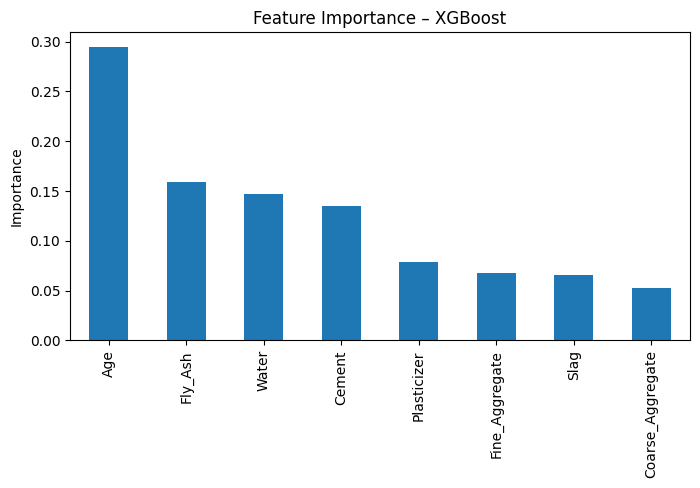

In [62]:
# Feature Importance

import matplotlib.pyplot as plt
import pandas as pd

importance = tuned_models["XGBoost (Tuned)"].feature_importances_

feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)

feat_imp.plot(kind="bar", figsize=(8,4))
plt.ylabel("Importance")
plt.title("Feature Importance – XGBoost")
plt.show()

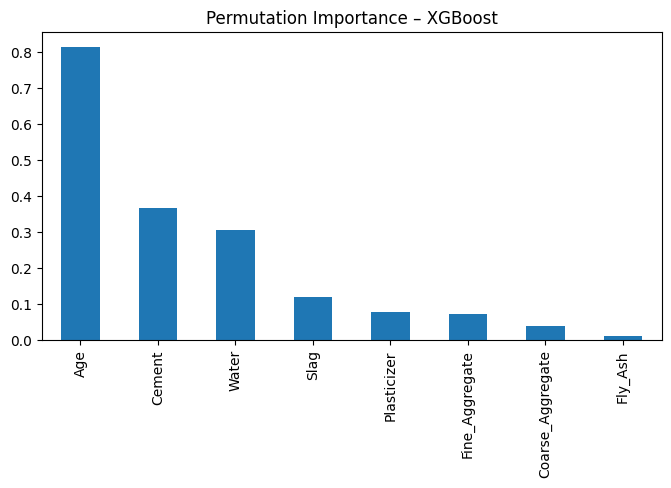

In [63]:
# Permutation Importance

from sklearn.inspection import permutation_importance

perm = permutation_importance(
    tuned_models["XGBoost (Tuned)"],
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="r2"
)

perm_imp = pd.Series(
    perm.importances_mean,
    index=X.columns
).sort_values(ascending=False)

perm_imp.plot(kind="bar", figsize=(8,4))
plt.title("Permutation Importance – XGBoost")
plt.show()

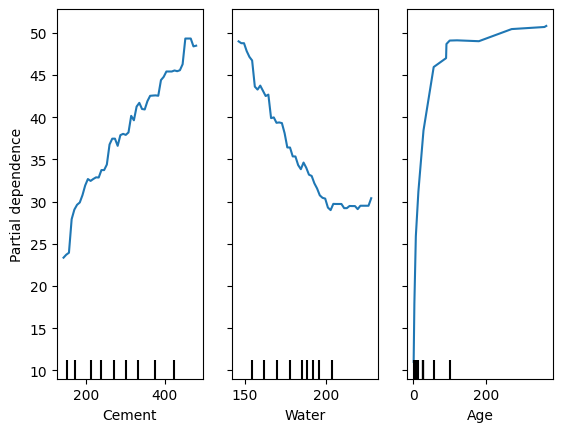

In [67]:
#Partial Dependance Plots

from sklearn.inspection import PartialDependenceDisplay

features = ["Cement", "Water", "Age"]

PartialDependenceDisplay.from_estimator(
    tuned_models["XGBoost (Tuned)"],
    X,
    features,
    grid_resolution=50
)
plt.show()

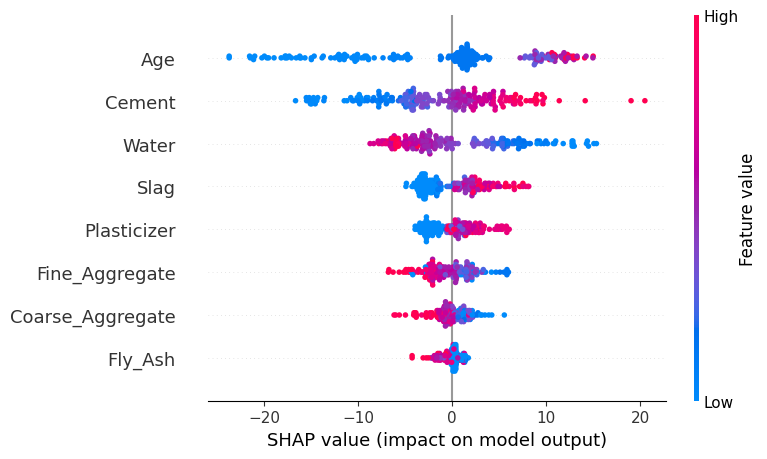

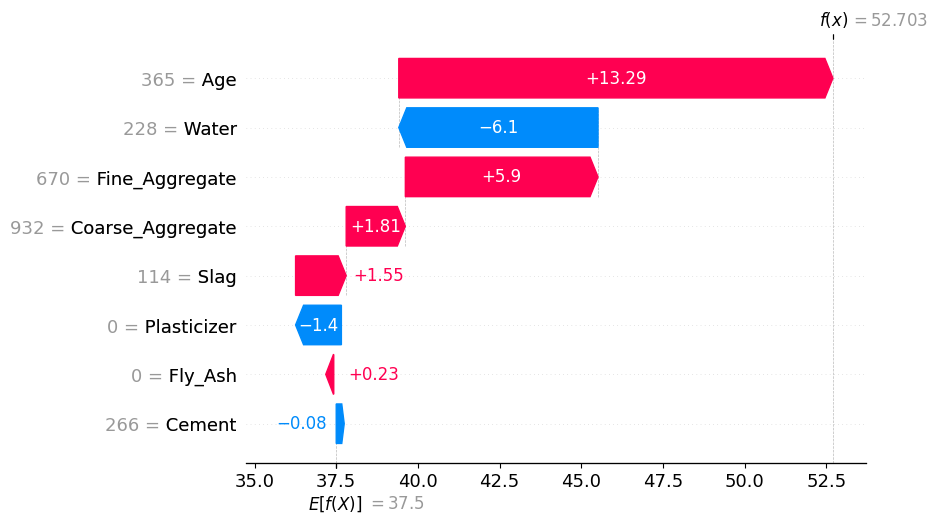

In [68]:
# SHAP Values

#!pip install shap

import shap

explainer = shap.Explainer(tuned_models["XGBoost (Tuned)"], X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap_values[0])

# **13. Model Saving**

In [69]:
# or best_rf / best_gb
from sklearn.preprocessing import FunctionTransformer

final_model = Pipeline([
    ("feature_engineering", FunctionTransformer(feature_engineering, validate=False)),
    ("model", best_xgb)
])

import joblib
joblib.dump(final_model, "concrete_strength_model.pkl")

import json
feature_names = list(X.columns)
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

# **14. Reuse / Deployment**

In [70]:
import joblib
import json

model = joblib.load("concrete_strength_model.pkl")

with open("feature_names.json", "r") as f:
    feature_names = json.load(f)

In [71]:
# Making a prediction on new data - one new concrete mix

import pandas as pd

new_sample = {
    "Cement": 300,
    "Slag": 50,
    "Fly_Ash": 30,
    "Water": 180,
    "Plasticizer": 8,
    "Coarse_Aggregate": 1000,
    "Fine_Aggregate": 750,
    "Age": 28
}

new_df = pd.DataFrame([new_sample])[feature_names]

prediction = model.predict(new_df)

print(f"Predicted Strength: {prediction[0]:.2f} MPa")

ValueError: feature_names mismatch: ['Cement', 'Slag', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age'] ['Cement', 'Slag', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Water_Cement_Ratio', 'Total_Binder', 'SCM_Replacement_Ratio', 'Water_Binder_Ratio', 'Aggregate_Binder_Ratio', 'Log_Age', 'SCM_Age_Interaction']
training data did not have the following fields: Water_Cement_Ratio, Total_Binder, Water_Binder_Ratio, Aggregate_Binder_Ratio, Log_Age, SCM_Replacement_Ratio, SCM_Age_Interaction